# **Flight Price Prediction**
<img src="https://imgur.com/1d67n2a.png">

## **About Dataset**
### INTRODUCTION

The objective of the study is to analyse the flight booking dataset obtained from [EaseMyTrip](https://easemytrip.com) website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The Machine Learning Regression algorithms are used to train the dataset and predict a continuous target variable. [EaseMyTrip](https://easemytrip.com) is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

### DATASET

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are **300,261** datapoints and **11** features in the cleaned dataset.

### FEATURES

The various features of the cleaned dataset are explained below:

1. Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8. Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. Price: Target variable stores information of the ticket price.

In this notebook we will explore Supervised Machine Learning methods. Regression models such as linear regression, decision tree and ensemble models such as RandomForest will be trained to predict flight prices using **Scikit Learn**.  We will use **Pandas**, **Numpy**, **Matplotlib** and **Seaborn** to perform exploratory data analysis and gather insights for machine learning. We will do the following

- Install and Import libraries
- Exploring the dataset and merge different files as required
- Translate the business problem to a machine learning problem
- EDA - exploratory data analysis
- Feature Engineering
- Data preparation - Train Val Split, Encoding, Imputing and Scaling
- Select input features
- Define evaluation metrics
- Define baseline model
- Select best model without hyperparameter tuning
- Hyperparameter tuning for select models
- Make predictions
- Save the best model
- Summarise insights and learning

# Downloading Dataset

In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


[**Opendatasets**](https://github.com/JovianML/opendatasets)

`opendatasets` is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
datasets_url = ('https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?datasetId=1957837')
od.download('https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?datasetId=1957837')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedazzaamahmed
Your Kaggle Key: ··········


100%|██████████| 4.16M/4.16M [00:01<00:00, 3.54MB/s]


In [4]:
data_filename = ('./flight-price-prediction/Clean_Dataset.csv')

In [5]:
#Reading the CSV file
df = pd.read_csv(data_filename) 

In [6]:
df.shape #Shape of the dataset. This dataset has 300,153 rows and 12 columns

(300153, 12)

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
#Dropping useless column
df = df.drop('Unnamed: 0',axis = 1)

In [7]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.columns #Viewing all the columns of the dataset

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [ ]:
df.info() #info() gives us the information about the shape, datatype and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


# Exploratory Data Analysis

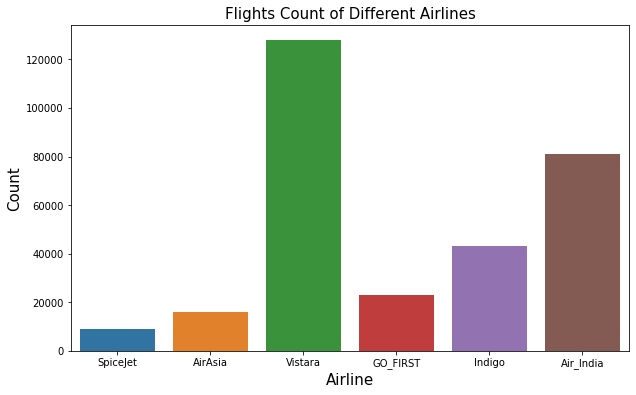

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='airline',data=df)
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

By the above graph we can clearly see that Vistara Airlines has the highest number of flights compared to all other flights.

Text(0.5, 0, 'Price in ₹')

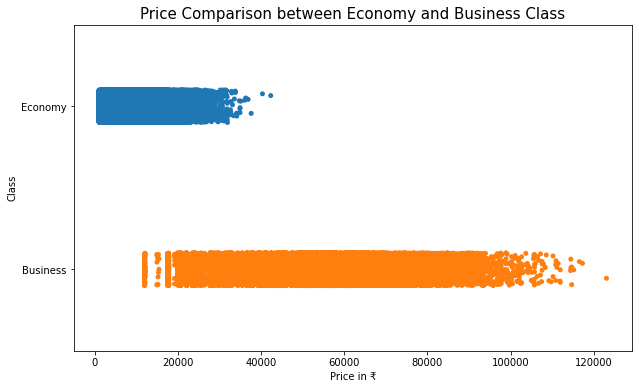

In [ ]:
plt.figure(figsize=(10,6))
sns.stripplot(x='price',y='class',data=df)
plt.title('Price Comparison between Economy and Business Class',fontsize=15)
plt.ylabel('Class')
plt.xlabel('Price in ₹')

Business class is generally more expensive than economy class. The cost of a business class ticket is usually double or more than an economy class ticket. We can clearly see the difference of prices for business and economy class in the above graph.

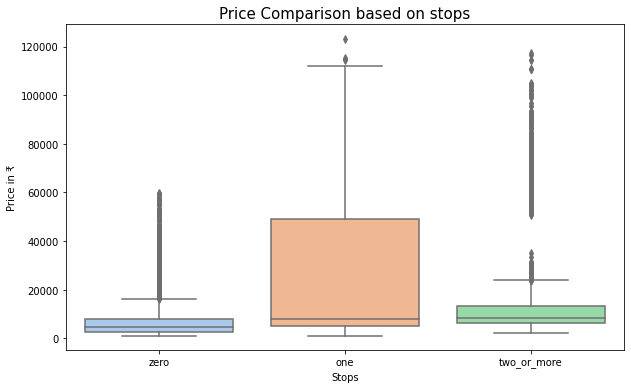

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='stops',y='price',data=df,palette='pastel')
plt.title('Price Comparison based on stops',fontsize=15)
plt.xlabel('Stops')
plt.ylabel('Price in ₹')
plt.show()

Generally, the fewer the number of stops, the lower the cost of the flight.

Zero Stop: Zero stop flights are the most direct, and typically the cheapest. Prices for zero stop flights are generally low comparable to those of one stop flights.

One Stop: One stop flights tend to be slightly more expensive than zero stop flights, but still offer great value for money. Prices for one stop flights may be slightly higher due to additional airport fees and taxes.

Two or More Stops: Prices for flights with two or more stops are hihgly fluctuating and also depends on airline, route, time and many factors.

Text(0.5, 1.0, 'Price Comparison on Departure time')

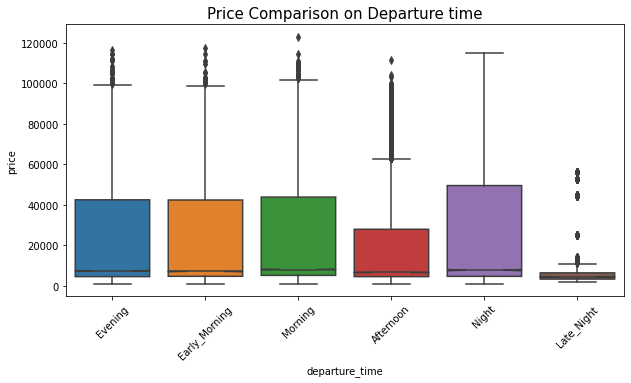

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='departure_time',notch= True,y='price',data=df).tick_params(axis='x', rotation=45)
plt.title('Price Comparison on Departure time',fontsize=15)

Late-night flights are usually cheaper than flights departing during the day. Airlines typically offer special discounts on flights that depart late at night. This is because these flights have fewer passengers, allowing airlines to offer lower prices. Additionally, airlines may offer discounted fares to fill up empty seats on late-night flights.

Text(0.5, 1.0, 'Price Comparison on Arrival time')

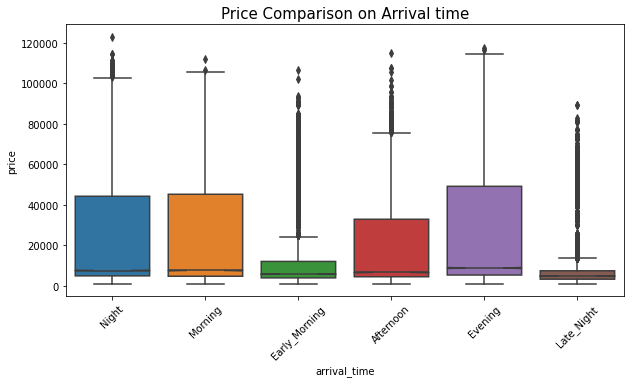

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='arrival_time',notch= True,y='price',data=df).tick_params(axis='x', rotation=45)
plt.title('Price Comparison on Arrival time',fontsize=15)


Flight prices comparison based on arrival time will show that late night and early morning flights are usually cheaper due to lower demand for these times. Airlines are also more likely to offer discounts for flights at off-peak times in order to fill seats.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


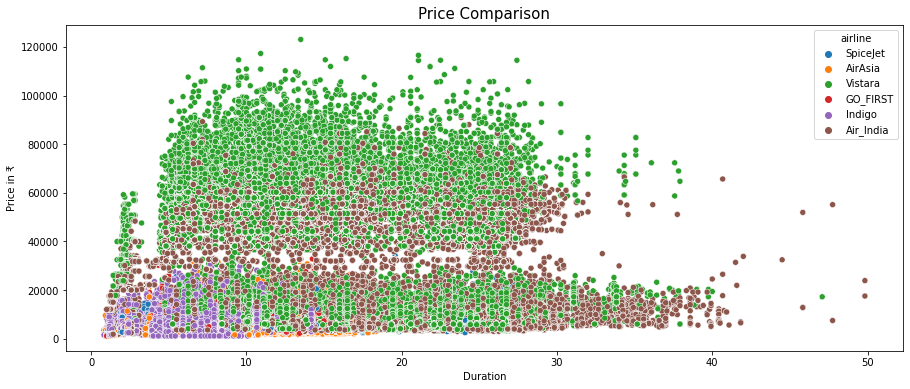

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(df['duration'],df['price'],hue=df['airline'])
plt.title('Price Comparison',fontsize=15)
plt.xlabel('Duration')
plt.ylabel('Price in ₹')
plt.show()

Vistara is typically more expensive than other airlines due to its higher quality of service and additional amenities. Vistara is known for providing a more comfortable in-flight experience, with larger seats, more legroom, and better entertainment options. However, that doesn't mean that Vistara is always the most expensive option.

Text(0.5, 1.0, 'Flight Price Distribution Plot')

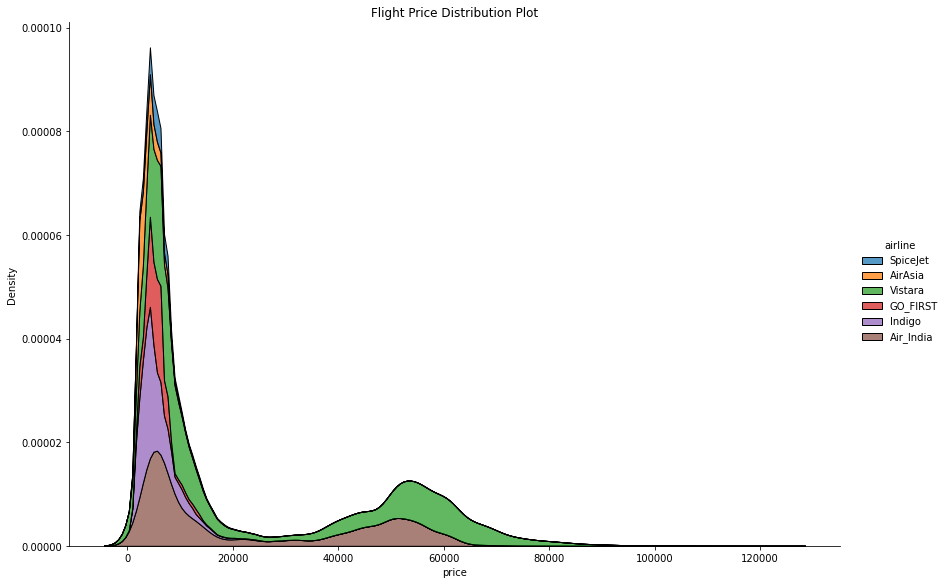

In [ ]:
sns.displot(x="price", hue="airline", kind="kde",
            multiple="stack",data=df,height=8, aspect=15/10)
plt.title('Flight Price Distribution Plot')

Generally, domestic flights within India are relatively affordable, and you can often find Economy Class tickets for under 5,000 rupees. However, if you are traveling during peak season or on a popular route, you may need to pay more. The most expensive domestic flights within India can cost up to 15,000 rupees or more.

Text(0.5, 1.0, 'Average prizes depending on the days left')

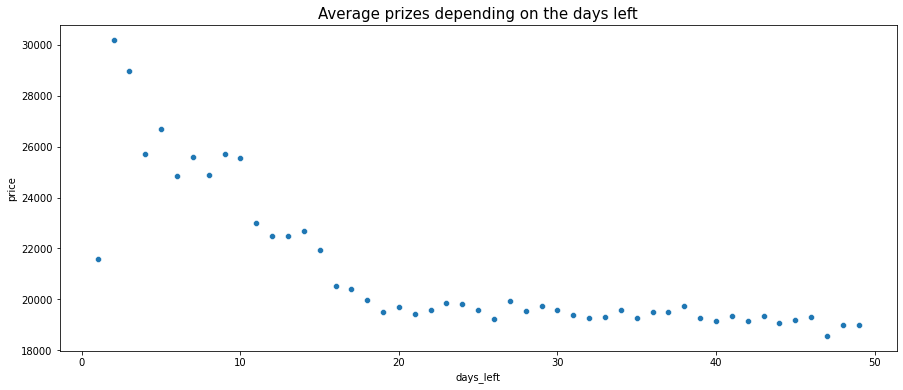

In [ ]:
df_rem = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
sns.scatterplot(x="days_left", y="price", data=df_rem).set_title("Average prizes depending on the days left",fontsize=15)

The closer the departure date, the higher the flight price. As the departure date approaches, airlines raise prices because the seats are more in demand and there are fewer seats left on the plane. For example, if a flight is departing within a week, you may find that the price is more expensive than if you had booked the same flight several weeks in advance.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


# Preparing Data For Training

In [8]:
df = df.drop('flight',axis = 1) # Dropping useless columns

## Encoding Categorical Data

**One Hot Encoding** is suitable for categorical data and is a commonly used method to represent data when building machine learning models. By using one hot encoding, the categorical data is transformed into a vector of binary values. This allows the model to understand the data better and to better differentiate between different categories. It also helps to prevent the model from overfitting or underfitting the data. Lastly, it makes the data easier to process for the model, which can speed up training.

In [9]:
from sklearn.preprocessing import OneHotEncoder # One Hot Encoding Categorical Data

In [10]:
categorical_cols = ['airline',	'source_city',	'departure_time',	'stops',	'arrival_time',	'destination_city',	'class']

In [11]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categorical_cols])

In [12]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [14]:
df = df.drop(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time','destination_city', 'class',], axis = 1)

In [15]:
df.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [16]:
df.columns

Index(['duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Bangalore',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'stops_one', 'stops_two_or_more', 'stops_zero',
       'arrival_time_Afternoon', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai', 'class_Business',
       'class_Economy'],
      dtype='object')

## Input and Target Columns

In [17]:
input_col = df.drop(['price'], axis = 1) # Splittig input and target column by dropping target variable 

In [18]:
input_col

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2.33,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2.17,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2.25,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.33,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
300149,10.42,49,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
300150,13.83,49,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
300151,10.00,49,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
target_col = df.iloc[:,2:3] # Taking target variable for target column i.e 'price' column

In [20]:
target_col.head()

,price
0,5953
1,5953
2,5956
3,5955
4,5955


## Scaling Numeric Features

**Scaling numeric features** is an important step in data preprocessing when creating machine learning models. Scaling is necessary because the range of values of raw data often varies widely, which can cause poor performance in some machine learning algorithms due to the disproportionate impact of certain values. For example, consider a dataset that contains a feature with values ranging from 0 to 1,000,000. Without scaling, algorithms like linear regression or logistic regression might weight the value of 1,000,000 much more heavily than the value of 1, thus skewing the model.

By scaling the values, we can ensure that all features are treated equally and that no single feature has too much of an impact. Scaling also helps to reduce the time it takes for the model to converge, as gradient descent converges much faster on scaled data than on unscaled data.

In [21]:
numeric_cols = ['duration',	'days_left']

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[numeric_cols])

In [23]:
input_col[numeric_cols] = scaler.transform(input_col[numeric_cols])

## Training, Validation and Test Sets

Training, validation, and testing are three distinct phases of the model development process. Training is the process by which a model is developed and tuned to fit the data it is given. The goal of training is to find a set of parameters that best describe the data and generate the most accurate predictions. Validation is then used to assess the performance of the model on new data. This is done to ensure that the model is generalizing well to unseen data and is not overfitting to the training data. Finally, once the model has been validated, it can be tested on a separate test set to get a final performance measure. This is done to ensure that the model is performing as expected on unseen data.

So splitting the data into training, validation, and test sets when developing a machine learning model is required. The training set is used to teach the model, while the validation set is used to measure the model's performance as it learns. The test set is used to evaluate the performance of the model when all the training is complete.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_size=0.7 # 70% of the data goes for training

In [26]:
train_input_col, rem_input_col, train_target_col, rem_target_col = train_test_split(input_col,target_col, train_size=0.7) 

In [27]:
train_size=0.5
val_input_col, test_input_col, val_target_col, test_target_col = train_test_split(rem_input_col,rem_target_col, train_size=0.5) # 15% data goes for validation and other 15% goes for testing

In [28]:
print(train_input_col.shape), print(train_target_col.shape)
print(val_input_col.shape), print(val_target_col.shape)
print(test_input_col.shape), print(test_target_col.shape)

(210107, 37)
(210107, 1)
(45023, 37)
(45023, 1)
(45023, 37)
(45023, 1)


(None, None)

# Training Models

## Linear Regression

<img src='https://imgur.com/zVVwFOK.png' width='480'>

`Linear regression` is a type of supervised machine learning algorithm that is used to predict a continuous numerical value from a given set of data. It is a linear approach to modeling the relationship between a dependent variable and one or more independent variables. It assumes that the relationship between the variables is linear, and it uses the best-fit line to make the predictions. Linear regression can be used to model the relationship between a dependent variable and one or more independent variables, such as income and education level.

In [ ]:
#importing linear regression library
from sklearn.linear_model import LinearRegression

In [ ]:
model_lg = LinearRegression()

In [ ]:
#training linear regression
model_lg.fit(train_input_col,train_target_col)

LinearRegression()

In [ ]:
#predicting training data
train_preds = model_lg.predict(train_input_col)

In [36]:
#importing metrics
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [ ]:
#predicted values
train_preds

array([[10411.],
       [ 7269.],
       [ 7042.],
       ...,
       [ -437.],
       [ 5345.],
       [ 9145.]])

In [ ]:
#Checking mean squared error
train_rmse = mean_squared_error(train_target_col, train_preds, squared= False)

In [ ]:
print('The RMSE loss for the training set is ₹ {}.'.format(train_rmse))

The RMSE loss for the training set is ₹ 6776.510722262504.


In [ ]:
print('R2_score:', round(r2_score(train_target_col, train_preds),6))

R2_score: 0.910915


In [ ]:
#preidicting for validation data
val_preds = model_lg.predict(val_input_col)

In [ ]:
val_rmse = mean_squared_error(val_target_col, val_preds, squared= False)

In [ ]:
print('The RMSE loss for the validation set is ₹ {}.'.format(val_rmse))

The RMSE loss for the validation set is ₹ 6691.5398669378055.


In [ ]:
print('R2_score:', round(r2_score(val_target_col, val_preds),6))

R2_score: 0.913029


## Training different linear models

Let's define a function `try_model`, which takes a model, then performs training and evaluation.

In [65]:
def try_model(model):
    # Fit the model
    model.fit(train_input_col, train_target_col)
    
    # Generate predictions
    train_preds = model.predict(train_input_col)
    val_preds = model.predict(val_input_col)
    
    # Compute RMSE
    train_rmse = mean_squared_error(train_target_col, train_preds, squared=False)
    val_rmse = mean_squared_error(val_target_col, val_preds, squared=False)

    # Accuracy Score
    train_acc = model.score(train_input_col, train_target_col)
    val_acc = model.score(val_input_col, val_target_col)

    return train_acc, val_acc, train_rmse, val_rmse

In [66]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor

In [67]:
try_model(Ridge())

(0.9113935441279035, 0.9116271596270625, 6758.331873765019, 6746.118304192779)

In [68]:
try_model(Lasso())

(0.9113923604796687, 0.9116231320899374, 6758.37701416026, 6746.272027510069)

In [70]:
try_model(ElasticNet())

(0.6631399305870826,
 0.6629950073044242,
 13177.456716856874,
 13173.849981529054)

In [72]:
try_model(SGDRegressor())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9113322383799558, 0.9115835952635296, 6760.669474025329, 6747.780885924928)

## Decision Tree

<img src='https://imgur.com/qxiCMxd.png' width= '480'>

`Decision Tree Regressor` is a type of supervised machine learning algorithm used to predict a continuous or numeric value output. It is a non-parametric algorithm that uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches, each representing values for the attribute tested. Leaf node represents a decision on the numerical target. The topmost decision node in a tree, which corresponds to the best predictor, is called the root node.

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
model_dcr = DecisionTreeRegressor(random_state=42).fit(train_input_col, train_target_col)
model_dcr.score(train_input_col, train_target_col),model_dcr.score(val_input_col, val_target_col) # Accuracy Score

(0.9994232596347061, 0.9765538763641097)

In [35]:
train_preds_dcr = model_dcr.predict(train_input_col)
val_preds_dcr = model_dcr.predict(val_input_col)

In [45]:
train_rmse_dcr = mean_squared_error(train_target_col, train_preds_dcr, squared= False)

In [46]:
print('The RMSE loss for the training set is ₹ {}.'.format(train_rmse_dcr))

The RMSE loss for the training set is ₹ 544.3786842417256.


In [40]:
val_rmse_dcr = mean_squared_error(val_target_col, val_preds_dcr, squared= False)

In [42]:
print('The RMSE loss for the validation set is ₹ {}.'.format(val_rmse_dcr))

The RMSE loss for the validation set is ₹ 3486.0452262745666.


In [ ]:
#Tuning Hyperparameters
#max_depth
model_dcr = DecisionTreeRegressor(max_depth=21, random_state=42).fit(train_input_col, train_target_col)
model_dcr.score(train_input_col, train_target_col),model_dcr.score(val_input_col, val_target_col) # Accuracy Score

(0.9935911812385774, 0.9776275108198346)

In [ ]:
#max_leaf_nodes
model_dcr = DecisionTreeRegressor(max_leaf_nodes=1650, random_state=42).fit(train_input_col, train_target_col)
model_dcr.score(train_input_col, train_target_col),model_dcr.score(val_input_col, val_target_col) # Accuracy Score

(0.985043955064969, 0.9815179800369281)

In [43]:
#Combining all the hyperparameters
model_dcr_f = DecisionTreeRegressor(max_depth=21,max_leaf_nodes=1650, random_state=42).fit(train_input_col, train_target_col)
model_dcr_f.score(train_input_col, train_target_col),model_dcr.score(val_input_col, val_target_col) # Accuracy Score

(0.9839688586837315, 0.9765538763641097)

In [44]:
# Calculating RMSE
train_preds_dcr_f = model_dcr_f.predict(train_input_col)
val_preds_dcr_f = model_dcr_f.predict(val_input_col)
train_rmse_dcr_f = mean_squared_error(train_target_col, train_preds_dcr_f, squared= False)
val_rmse_dcr_f = mean_squared_error(val_target_col, val_preds_dcr_f, squared= False)
print('The RMSE loss for the training set is ₹ {}.'.format(train_rmse_dcr_f))
print('The RMSE loss for the validation set is ₹ {}.'.format(val_rmse_dcr_f))

The RMSE loss for the training set is ₹ 2870.0744249853074.
The RMSE loss for the validation set is ₹ 3264.1135780967875.


## Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model. 

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":

<img src="https://i.imgur.com/4Dg0XK4.png" width="480">

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestRegressor` class from `sklearn.ensemble`.

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model_rf =  RandomForestRegressor(random_state=42, n_jobs=-1).fit(train_input_col, train_target_col)
model_rf.score(val_input_col, val_target_col)

<ipython-input-30-c5562d9b4548>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf =  RandomForestRegressor(random_state=42, n_jobs=-1).fit(train_input_col, train_target_col)


0.984085072746252

In [37]:
train_preds_rf = model_rf.predict(train_input_col)
val_preds_rf = model_rf.predict(val_input_col)
train_rmse_rf = mean_squared_error(train_target_col, train_preds_rf, squared= False)
val_rmse_rf = mean_squared_error(val_target_col, val_preds_rf, squared= False)
print('The RMSE loss for the training set is ₹ {}.'.format(train_rmse_rf))
print('The RMSE loss for the validation set is ₹ {}.'.format(val_rmse_rf))

The RMSE loss for the training set is ₹ 1118.6408469789842.
The RMSE loss for the validation set is ₹ 2862.838671032942.


In [38]:
base_acc =  model_rf.score(train_input_col, train_target_col), model_rf.score(val_input_col, val_target_col), train_rmse_rf, val_rmse_rf
base_acc # accuracy and RMSE of our base model 

(0.9975724527938589, 0.984085072746252, 1118.6408469789842, 2862.838671032942)

Let's define a helper function `test_params` to make it easy to test hyperparameters.

In [45]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_input_col, train_target_col)
    
    train_preds = model.predict(train_input_col)
    val_preds = model.predict(val_input_col)

    train_rmse = mean_squared_error(train_target_col, train_preds, squared=False)
    val_rmse = mean_squared_error(val_target_col, val_preds, squared=False)

    return model.score(train_input_col, train_target_col), model.score(val_input_col, val_target_col), train_rmse, val_rmse

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators.



In [58]:
test_params(n_estimators=450)

<ipython-input-57-b24de8a629d7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_input_col, train_target_col)


(0.9976482609617601,
 0.9857959955440055,
 1099.2728496379866,
 2713.3317184254443)

In [46]:
base_acc

(0.9975724527938589, 0.984085072746252, 1118.6408469789842, 2862.838671032942)

### `max_depth`

These arguments are passed directly to each decision tree, and control the maximum depth. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a `max_depth` to reduce overfitting.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

In [47]:
test_params(max_depth=23)

<ipython-input-45-b24de8a629d7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_input_col, train_target_col)


(0.9961460247462176,
 0.9845793445257025,
 1409.4877066164684,
 2818.0322780539527)

In [48]:
base_acc

(0.9975724527938589, 0.984085072746252, 1118.6408469789842, 2862.838671032942)

### `max_features`

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

<img src="https://i.imgur.com/FXGWMDY.png" width="720">



In [49]:
test_params(max_features='sqrt')

<ipython-input-45-b24de8a629d7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_input_col, train_target_col)


(0.9974345827488934, 0.9830460797905984, 1149.968215615039, 2954.810363305739)

### `bootstrap`, `max_samples` 

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [50]:
test_params(bootstrap=True)

<ipython-input-45-b24de8a629d7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_input_col, train_target_col)


(0.9975724527938589, 0.984085072746252, 1118.6408469789842, 2862.838671032942)

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using `max_samples`. This can further generalize the model.

<img src="https://i.imgur.com/rsdrL1W.png" width="640">

In [51]:
test_params(max_samples=None)

<ipython-input-45-b24de8a629d7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_input_col, train_target_col)


(0.9975724527938589, 0.984085072746252, 1118.6408469789842, 2862.838671032942)

In [52]:
base_acc

(0.9975724527938589, 0.984085072746252, 1118.6408469789842, 2862.838671032942)

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings.

In [53]:
model = RandomForestRegressor(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=450,
                               max_depth=23)

In [54]:
model.fit(train_input_col, train_target_col)


<ipython-input-54-6fb2df681a90>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_input_col, train_target_col)


RandomForestRegressor(max_depth=23, n_estimators=450, n_jobs=-1,
                      random_state=42)

In [ ]:
model.score(train_input_col, train_target_col),model.score(val_input_col, val_target_col)

(0.9962763652432385, 0.9855858313035758)

In [60]:
train_preds_rf_f = model.predict(train_input_col)
val_preds_rf_f = model.predict(val_input_col)
train_rmse_f = mean_squared_error(train_target_col, train_preds_rf_f, squared=False)
val_rmse_f = mean_squared_error(val_target_col, val_preds_rf_f, squared=False)

In [61]:
train_rmse_f,val_rmse_f

(1398.5633775779222, 2815.357064277313)

In [59]:
base_acc

(0.9975724527938589, 0.984085072746252, 1118.6408469789842, 2862.838671032942)

Finally, let's also compute the accuracy and RMSE of our model on the test set.

In [62]:
model.score(test_input_col,test_target_col)

0.9858148473170169

In [64]:
test_preds = model.predict(test_input_col)
test_rmse = mean_squared_error(test_target_col, test_preds, squared=False)
test_rmse

2700.2577329488595


This result is very good and indicates that our model was able to generalize well to unseen data and make accurate predictions. This result also suggests that our model was able to capture the underlying patterns in the data and make accurate predictions.

# Summary and Insights

In this notebook we explored Supervised Machine Learning methods. Regression models such as linear regression, decision tree and ensemble models such as RandomForest were trained to predict flight prices.  We used **Pandas**, **Numpy**, **Matplotlib** and **Seaborn** to perform the exploratory data analysis and gather insights for machine learning.

- Our dataset had 300,153  rows and 14 columns. 

-  We prepared the data by merging features with the train and test data sets, split the train data into train and val sets, encoded categorical values and scaled the values using MinMaxScaler. 

- Since Linear regression models assume a normal distribution and also have other assumptions of independence of variables -  multicollinearity, heteroskedacity etc, our linear regression model performed bit poorly.

- Decision trees performed better as they are non-linear models but they also tend to overfit the data if unbounded. While we can tune the hyperparameters to reduce overfitting we can also use more powerful ensemble models.

- Ensemble models such as Random Forest reduce overfitting by bagging the results of multiple decision trees.

- **Random Forest** performed the best with simple inputs and even better after tuning some hyperparameter tuning.  



# Suggestions for Future Work 
- Tune SVM, Ridge, SGD models
- Optimal Hyperparameter tuning for example with RandomSearchCV
- Neural Network models such as LSTM
- Remove outliers and perform interventions post prediction
- Stacking models
- Cleaner and more robust pipeline for transformation
- Compare and contrast ARIMA, Prophet, Classical Machine Learning and Neural Network models
- Deploy the model on cloud.

# References
**Tutorials**  
-Linear Regression with Scikit-Learn [Jovian Aakash N S ](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/linear-regression-with-scikit-learn)  
- How to approach Machine Learning Problems [Jovian Aakash N S](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/how-to-approach-machine-learning-problems)  
- Gradient Boosting Machines with XGBoost [Jovian Aakash N S](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/gradient-boosting-machines-with-xgboost)  
- Jovian Youtube : [Youtube](https://www.youtube.com/c/JovianML)
- Machine Learnng A-Z : [Udemy](https://www.udemy.com/course/machinelearning/)

**Documentation**  
- Scikit Learn Supervised Learning [documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)  
- Pandas Documentation: https://pandas.pydata.org/docs/user_guide/index.html
- Seaborn gallery: https://seaborn.pydata.org/examples/index.html
- Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html
- Light GBM [documentation](https://lightgbm.readthedocs.io/en/latest/)  
- XGBoost [documentation](https://xgboost.readthedocs.io/en/latest/)


